# Parkinson Disease Detection
Parkinson Disease is a progressive neurological disorder that affects the nervous system. This disease is marked by the decrease in dopamine level. Dopamine plays a key role in control of movement. The Symptoms of Parkinson disease typically develop slowly over time and may include tremors, stiffness and difficulty moving, slow movement, and problems with balance and coordination. Though the exact cause of Parkinson disease is not fully understood, it is believed to be related to a combination of genetic and environmental factors. There is no cure for Parkinson disease, but medications and other treatments can help manage the symptoms.


As technology expands, Machine learning provides an exciting opportunity for healthcare to improve the diagnoses of patients with Parkinson disease. It can also be used to program computers to make predictions and draw critical patterns from the patients data. With this, Data Scientists in healthcare are able to make accurate and timely diagnoses of patients suffering from Parkinson disease which can improve patient outcomes.

## Aims and Objectives

The aim of this project is to develop a machine learning algorithm that predicts whether a patient has Parkinson Disease or not.

###  Data Sourcing: 
This has to do with sourcing for a near-perfect dataset for this project.

Data Preparation: This has to do with , cleaning, removal of outliers ,removal of columns that are not needed for the model and transforming the data through feature engineering. It also includes exploratory data analysis in order to derive meaningful insights from the dataset.

### Model Training: 
During this stage, the cleaned data is fed into the model, so that the model could learn the patterns from the dataset.

### Model Evaluation and Validation:
After training the model, the model should be used to make some predictions. Then some metrics will be used to evaluate its performance.

### Data Source 
The [datasets]('https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection') used for this project was gotten from kaggle:

### Data Description
* Matrix column entries (attributes):
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


In [1]:
## Import the needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
sns.set_style('dark')

In [2]:
df = pd.read_csv('Parkinsson disease.csv')
df.head().style.background_gradient()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data Exploration 

In [3]:
df.shape

(195, 24)

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df.describe().style.background_gradient()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot:>

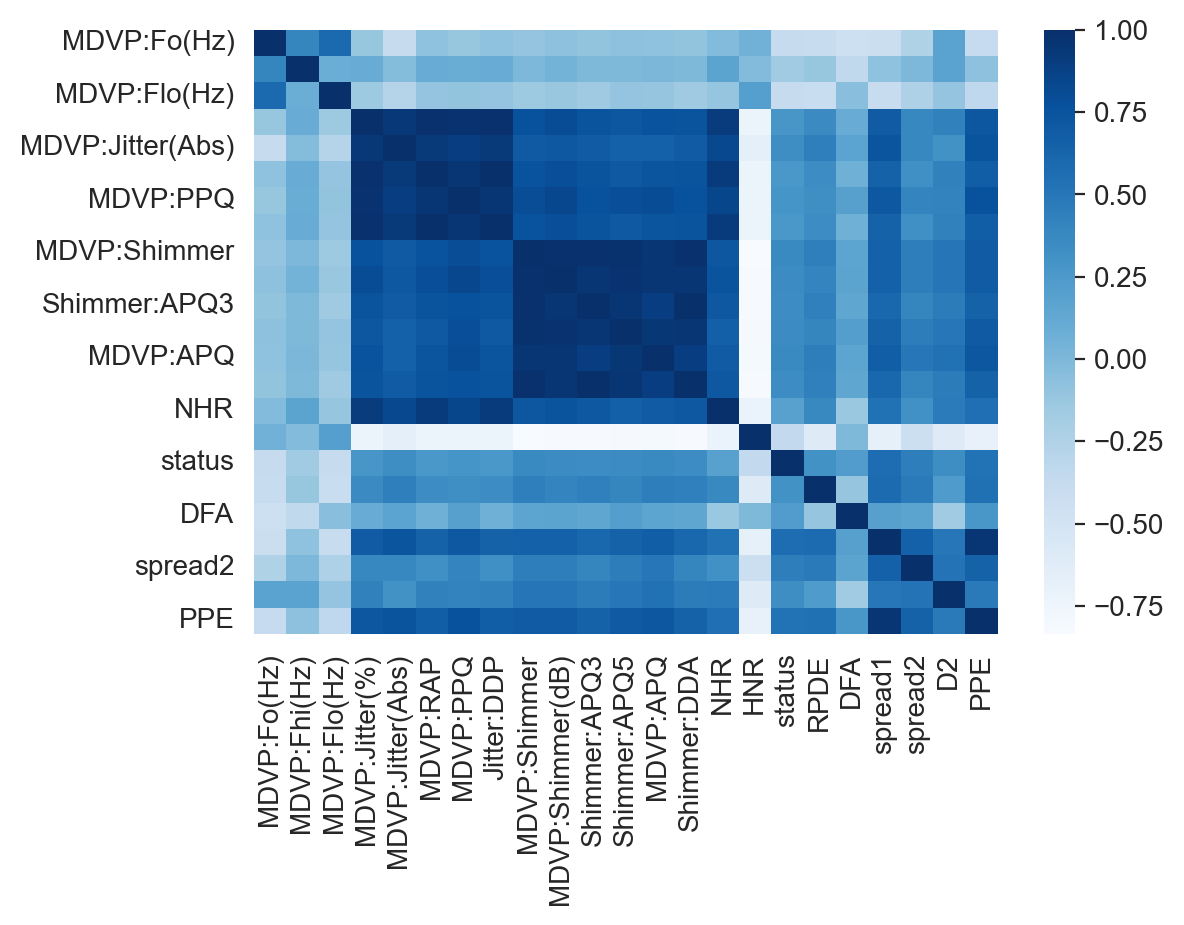

In [6]:
plt.figure(dpi=200)
sns.heatmap(data=df.corr(),cmap='Blues')

In [7]:
corr_df =df.corr().abs()['status'].sort_values(ascending=False)
corr_df

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

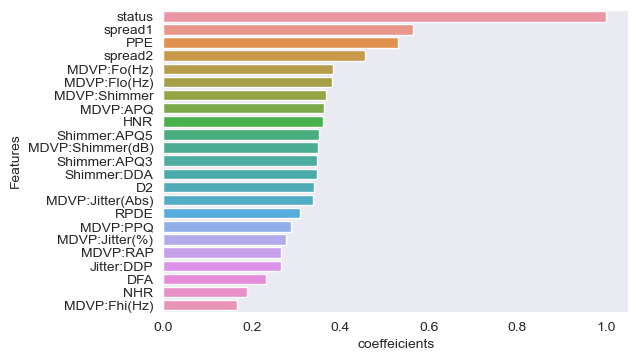

In [8]:
plt.figure(dpi=100)
sns.barplot(x=corr_df,y=corr_df.index)
plt.xlabel('coeffeicients')
plt.ylabel('Features')
plt.show()

Drop the least five correlated features

In [9]:
df.drop(columns=['name','MDVP:Fhi(Hz)','NHR','DFA','Jitter:DDP','MDVP:RAP'],inplace=True)

In [10]:
def create_barplot(data):
    plt.figure(dpi=100)
    plt.title('Distribution of Patients Parkinsson Status')
    sns.countplot(data=data,x='status')
    plt.show()

In [11]:
status_percent=df['status'].value_counts(normalize=True).sort_values()
status_percent

0    0.246154
1    0.753846
Name: status, dtype: float64

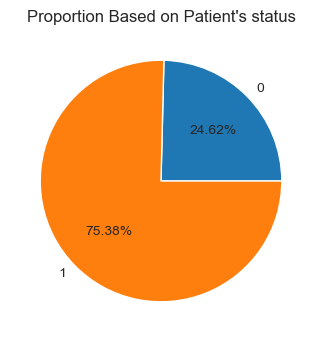

In [12]:
plt.figure(dpi=100)
plt.title("Proportion Based on Patient's status")
plt.pie(x=status_percent.values,labels=status_percent.index,autopct='%1.2f%%')
plt.show()

The illustrative graph above shows that there is class imbalance for the target variable ‘status’, with 75.5% of patients are with Parkinson while the remaining 24.6% are don’t have Parkinson. This dataset needs to be balanced before developing ML algorithm for classification.


In [13]:
def create_boxplot(colseries,title):    
    plt.figure(dpi=100)
    sns.boxplot(data=df,y=colseries,x='status')
    plt.title(title)
    plt.show()

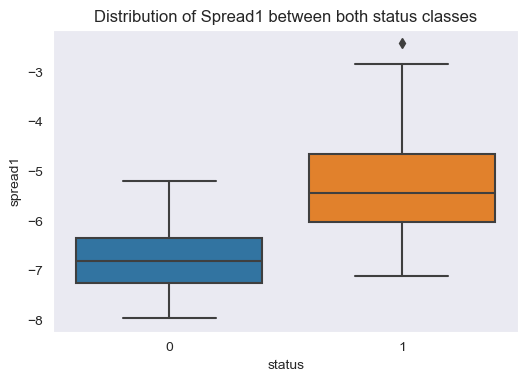

In [14]:
create_boxplot('spread1','Distribution of Spread1 between both status classes')

The boxplots shows that patients with Parkinson disease have higher median value in spread1 

In [15]:
def create_kdeplot(col_series,title):   
    plt.figure(dpi=100)
    plt.title(title)
    sns.kdeplot(data=df,x=col_series,hue='status',shade=True)
    plt.show()

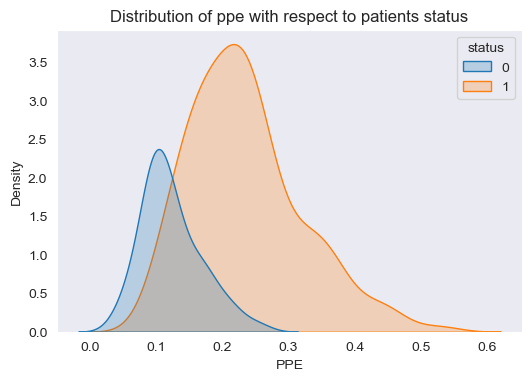

In [16]:
create_kdeplot('PPE','Distribution of ppe with respect to patients status')

From the  kdeplot above, we could see that patients without Parkinson disease, the ppe is clustered  more at 0.1 while on the other hand patients with Parkinson has ppe clustered more within the 0.2 and 0.3. We could it also have  more variance . This means that Parkinson are discovered more on patient with high ppe.


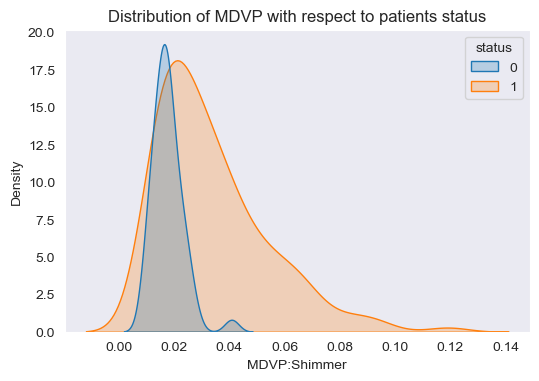

In [17]:
create_kdeplot('MDVP:Shimmer','Distribution of MDVP with respect to patients status')

From the first kdeplot, we could see that patients without Parkinson disease, the ppe is clustered  more at 0.02 while on the other hand patients with Parkinson has ppe clustered more at 0.03. We could it also have  more variance . This means that Parkinson are discovered more on patient with high ppe.


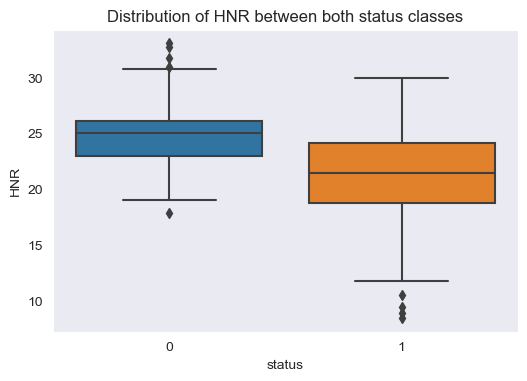

In [18]:
create_boxplot('HNR','Distribution of HNR between both status classes')

In [19]:
from sklearn.utils import resample,shuffle

In [20]:
df_minority = df[df['status']==0]
df_majority =df[df['status']==1]

In [21]:

df_upsample = resample(df_minority,replace=True,n_samples=140,random_state=42)

In [22]:
df =df_upsample.append(df_majority,ignore_index=True)

In [23]:
df.shape

(287, 18)

In [24]:
df=shuffle(df)

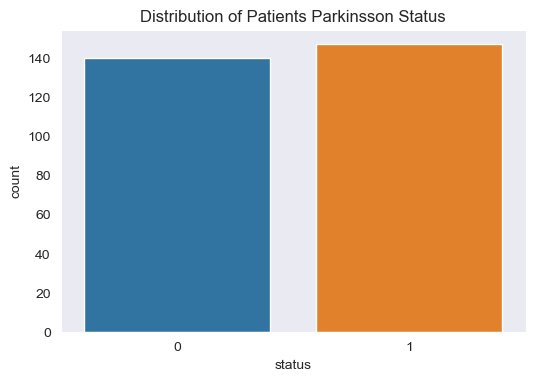

In [25]:
create_barplot(df)

After oversampling the dataset, we were able to handle the imbalanced state of the datasets

In [26]:
X= df.drop(columns=['status'])
y=df['status']

#### Spliting Data into Training and Test Dataset

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
y_train.value_counts()

1    104
0     96
Name: status, dtype: int64

#### Scaling the  Features

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

#### Hyperameter Tuning

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import  MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
import imblearn.over_sampling as sm

In [34]:
models = {'Random Forest':RandomForestClassifier(),
         'SVC': SVC(),
         'KNN':KNeighborsClassifier(),
         'Decision Tree':DecisionTreeClassifier(),
         'XGB':XGBClassifier(),
         'LR':LogisticRegression()}

In [35]:
cv_scores =[]
for model in  models.values():
    kf = KFold(n_splits=6,shuffle=True,random_state=42)
    cv_result = cross_val_score(model,X_train,y_train,cv=kf,n_jobs=-1)
    cv_scores.append(cv_result)

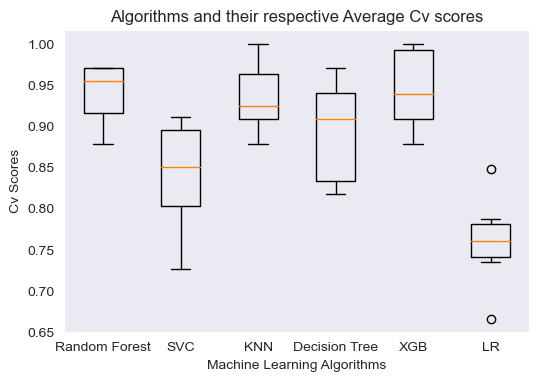

In [36]:
plt.figure(dpi=100)
plt.title('Algorithms and their respective Average Cv scores')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Cv Scores')
plt.boxplot(cv_scores,labels=models.keys())
plt.show()

from the above boxplot, we could say that Xgboost performed cosistently the most. It has the highest median value.

In [37]:
xgb = XGBClassifier()
param_grid = {'n_estimators':[60,100,120,150,180,200,300,500],
             'max_depth':[2,4,6,8],
             'learning_rate':[0.01,0.03,0.05,0.08,0.1,1.0]}

In [38]:


grid_model= GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,n_jobs=-1)
grid_model.fit(X_train,y_train)

best_model =grid_model.best_estimator_
best_model


y_pred =best_model.predict(X_test)


In [39]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
class_report =classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.91      0.95        43

    accuracy                           0.95        87
   macro avg       0.96      0.95      0.95        87
weighted avg       0.96      0.95      0.95        87



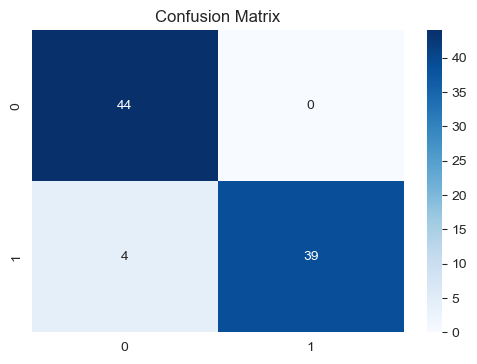

In [41]:
plt.figure(dpi=100)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.show()

* Precision : out of all the patients predicted to be diagnosed with Parkinson, all of them actually did.
* Recall: Out of all the patients predicted to be diagnosed with Parkinson, 98% of them actually did.
* F1 Score: The f1 score is 0.98. Since the f1 score is actually close to 1, this shows that the model did a very good job in predicting whether or not a patient has Parkinson disease.

In [42]:
features_importance =pd.DataFrame({"features":X.columns,'coef':best_model.feature_importances_}).sort_values(by='coef',ascending=False)
features_importance

,features,coef
16,PPE,0.304748
6,MDVP:Shimmer(dB),0.116735
13,spread1,0.088798
14,spread2,0.070000
5,MDVP:Shimmer,0.062602
10,Shimmer:DDA,0.058905
0,MDVP:Fo(Hz),0.058069
12,RPDE,0.046903
2,MDVP:Jitter(%),0.031844
15,D2,0.031081


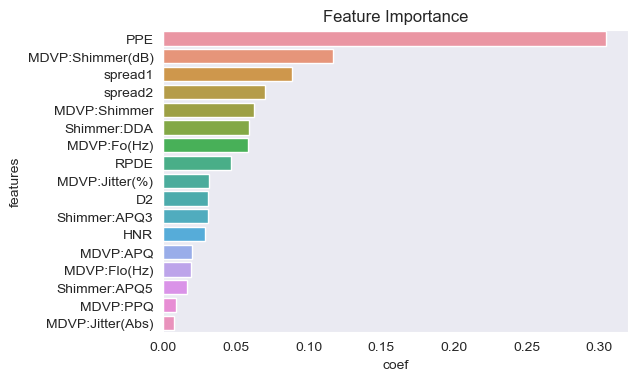

In [43]:
plt.figure(dpi=100)
plt.title('Feature Importance')
sns.barplot(data=features_importance,y='features',x='coef')
plt.show()

From the above barplot,we can see that the PPE is th most important feature in the model

### Conclusion
After trying out several Algorithms the Xgboost Classifier proved the best the most consistent in all iterations. In order to improve the model hyperparameter tuning was carried out. The model's accuracy of detecting Parkinson disease was 98% with the f1_scores of 0.98. All of this points towards the model been viable enough to predicting Parkinson Disease.


### Limitation of Study
* The original dataset was   195  but while handling it’s imbalanced state we had to oversample the no Parkinson records and     the total dataset increased to 287 records.

* During the course of this  project  we tried 5 different algorithms and selected the one that performed consistently in all     iterations.For the best performing algorithm we which the Xgboost Classifier we did Hyperparameter Tuning for further      improvement.

* I did an extensive Exploratory Data Analysis so as to get the much needed insight about the relevant features affecting the target variable . This enabled us to drop some of the features.From the tuned Xgboost model, i discovered the top features with the help of the feature importance function.


